In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Carrega e preprocessa os dados
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Carrega o modelo VGG16 pré-treinado
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Modifica as últimas duas camadas
vgg16.trainable = True
fine_tune_at = 15

for layer in vgg16.layers[:fine_tune_at]:
    layer.trainable = False

x = Flatten()(vgg16.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # CIFAR-10 has 10 classes

# Treina e compila o modelo
model = Model(inputs=vgg16.input, outputs=x)
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Gera novas imagens
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(train_images)

# Treina o modelo
model.fit(datagen.flow(train_images,
                       train_labels,
                       batch_size=64),
          epochs=20,
          validation_data=(test_images,
                           test_labels))

# Avalia o modelo
loss, accuracy = model.evaluate(test_images, test_labels)

Epoch 1/20
782/782 [==============================] - 50s 58ms/step - loss: 1.1821 - accuracy: 0.5854 - val_loss: 0.9120 - val_accuracy: 0.6786
Epoch 2/20
782/782 [==============================] - 45s 58ms/step - loss: 0.9455 - accuracy: 0.6665 - val_loss: 0.8844 - val_accuracy: 0.6946
Epoch 3/20
782/782 [==============================] - 43s 55ms/step - loss: 0.8613 - accuracy: 0.6974 - val_loss: 0.8040 - val_accuracy: 0.7233
Epoch 4/20
782/782 [==============================] - 46s 59ms/step - loss: 0.8196 - accuracy: 0.7112 - val_loss: 0.7843 - val_accuracy: 0.7271
Epoch 5/20
782/782 [==============================] - 46s 59ms/step - loss: 0.7744 - accuracy: 0.7270 - val_loss: 0.7613 - val_accuracy: 0.7330
Epoch 6/20
782/782 [==============================] - 47s 60ms/step - loss: 0.7361 - accuracy: 0.7394 - val_loss: 0.7492 - val_accuracy: 0.7407
Epoch 7/20
782/782 [==============================] - 46s 58ms/step - loss: 0.7069 - accuracy: 0.7504 - val_loss: 0.6997 - val_accuracy:

1/1 [==============================] - 1s 622ms/step


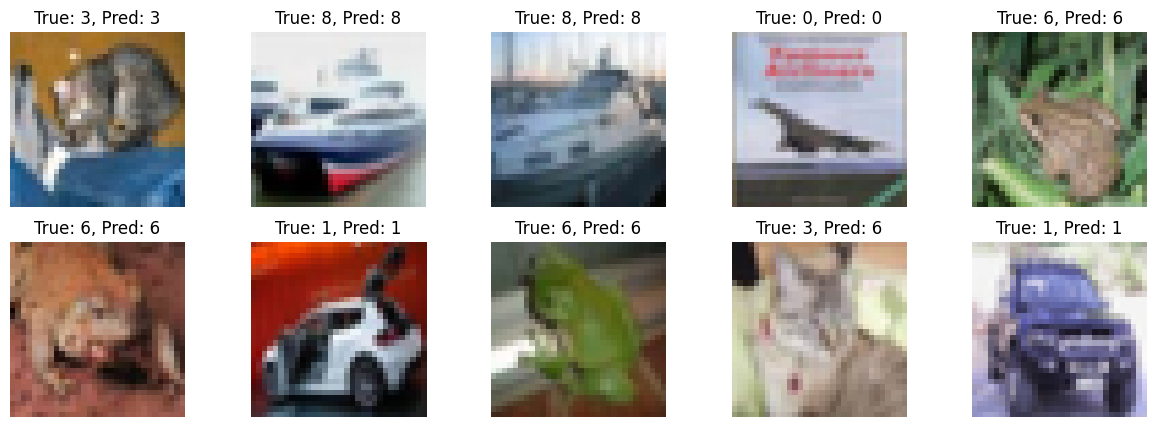

In [ ]:
def plot_image_predictions(model, images, true_labels, num_images=10):
    # Usa as predições do modelo
    predictions = model.predict(images[:num_images])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(true_labels[:num_images], axis=1)

    # Plota as imagens e as predições
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {true_classes[i]}, Pred: {predicted_classes[i]}")
        plt.axis('off')
    plt.show()

plot_image_predictions(model, test_images, test_labels)